Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import os
import tensorflow as tf
import logging
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense,Embedding,Masking,LayerNormalization
import seaborn as sns
from sklearn.metrics import confusion_matrix

Data preprocessing

In [ ]:
scaler = StandardScaler()
root0='/HandwrittenDigitsData/'
df=pd.DataFrame()
for a in range(20):
    root1=root0+'P'+str(a+1)+'/'
    for b in range(10):
        root2 = root1+'D'+str(b)+'/'
        for c in range(50):
            root3 = root2 + str(c+1)+'_'+'D'+str(b)+'.csv'
            temp=pd.read_csv(root3)
            cols = temp.columns
            print(root3)
            temp=scaler.fit_transform(temp)
            temp=pd.DataFrame(temp,columns=cols)
            temp=temp.reindex(range(500),fill_value=0)
            df=df.append(temp)
print(df.head)
df.to_csv('./train.csv',index=False)
df1=df.iloc[:3500000,:]
df2=df.iloc[3500000:,:]
df1.to_csv('./ntrainx.csv',index=False)
df2.to_csv('./ntrainy.csv',index=False)

Loading data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/ntrainx.csv')
df2=pd.read_csv('/content/drive/MyDrive/data/trainy.csv')
df3=pd.read_csv('/content/drive/MyDrive/data/ntestx.csv')
df4=pd.read_csv('/content/drive/MyDrive/data/testy.csv')

reshaping the data to correct proportions

In [ ]:
arr =np.array(df)
arr= arr.reshape(7000,500,9)
df2=to_categorical(df2)
arr2=np.array(df3)
arr2=arr2.reshape(3000,500,9)
df4=to_categorical(df4)

Sequential api - used for creating models layer by layer

In [ ]:
model = Sequential()

Masking

In [ ]:
model.add(Masking(mask_value=0, input_shape=(500, 9)))

LSTM layer

In [ ]:
model.add(LSTM(100,input_shape=(500,9)))

Layer normalization

In [ ]:
model.add(LayerNormalization())

Output layer

In [ ]:
model.add(Dense(10,activation='softmax'))

Compiling

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

Training

In [ ]:
history=model.fit(arr,df2,epochs= 100,batch_size=32,validation_data=(arr2,df4),callbacks=[
  keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/data/checkpoint',monitor="val_accuracy",mode="max",save_best_only=True,save_freq="epoch"),
])

Testing

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fc399a80fd0>>
94/94 [==============================] - 9s 84ms/step - loss: 0.1906 - accuracy: 0.9610


Text(33.0, 0.5, 'predicted')

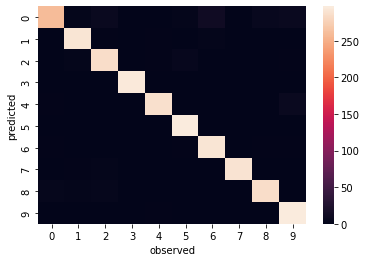

In [ ]:
model =tf.keras.models.load_model("/content/drive/MyDrive/data/checkpoint/")
prediction= model.predict(arr2)
accuracy=model.evaluate(arr2,df4)
ax=plt.subplot()
matrix_confusion = confusion_matrix(np.argmax(df4,axis=1), np.argmax(prediction,axis=1))
sns.heatmap(matrix_confusion,ax=ax)
ax.set_xlabel('observed')
ax.set_ylabel('predicted')

Model evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


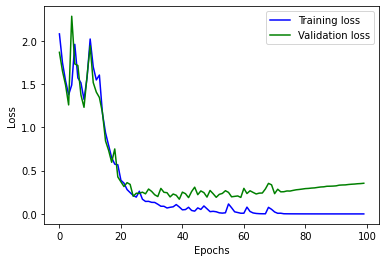

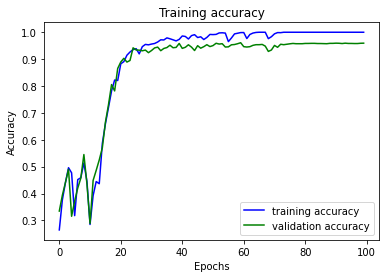

In [ ]:
loss_train = history.history['loss']
loss_val= history.history['val_loss']
data = history.history.keys()
acc_val = history.history['val_accuracy']
acc_train = history.history['accuracy']
epochs=range(100)
plt.plot(epochs,loss_train,'b',label='Training loss')
plt.plot(epochs,loss_val,'g',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs,acc_train,'b',label='training accuracy')
plt.plot(epochs,acc_val,'g',label='validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()